# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**: Beatriz Rogers Tripoli Barbosa

**RA**: 792170 

**Nome**: Laura Naomi Seto

**RA**: 813210


---
## Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

### Análise dos atributos

A seguir, estão listados todos os atributos provenientes da base de dados, com seus respectivos problemas em potencial identificados em uma análise prévia:

* **Id**: Identificação única do registro.

* **Peso**: Peso corporal do paciente [kg]
    * valores faltantes

* **Altura**: Altura do paciente [cm]
    * valores fora do intervalo aceitável (0 é válido?)

* **Índice de Massa Corporal** (IMC): $$\frac{Peso}{Altura^2}$$    
    * valores fora do intervalo válido
    * valores faltantes acarretados por: peso ou altura não registrados ou igual a 0

* **Atendimento**: Data de atendimento [DD/MM/AA]
    * valores inválidos

* **Data de Nascimento** (DN): Data de nascimento [DD/MM/AA]
    * valores faltantes
    * valores inválidos

* **Idade**: Idade no momento do atendimento [anos]
    * valores não numéricos ('#VALUE!') acarretados por: atendimento e/ou data de nascimento inválidos 
    * valores fora do intervalo aceitável (idades negativas e pacientes não pediátricos)
    * valores faltantes acarretados por: data de nascimento não registrado
    * valores aparentemente válidos mas atendimento e/ou data de nascimento inválidos

* **Convênio**: Tipo de plano de saúde utilizado para o atendimento

* **Pulsos**: Avaliação da presença e qualidade dos pulsos arteriais [normais, outro, amplos, femorais diminuidos, diminuídos]
    * adotar formas canônicas para os valores possíveis
    * tratamneto por moda baseado na classe
    * conversão simbólico-numérico com **label encoding (ordinal) ou hot-one encoding (nominal)**

* **PA Sistólica**: Valor mais alto registrado durante o batimento cardíaco [mmHg]
    * valores fora fora do intervalo aceitável
    * valores faltantes

* **PA Diastólica**: Valor mais baixo registrado entre os batimentos cardíacos [mmHg]
    * valores fora do intervalo aceitável
    * valores faltantes 

* **Pressão de Pulso Arterial** (PPA): [normal, pre-hipertensão pas, pre-hipertensão pad, has-1 pas, has-1 pad, has-2 pas, has-2 pad]
    * valor inválido ('#VALUE!')
    * conversão simbólico-numérico com label encoding (ordinal)

* **B2**: Segundo som cardíaco [normal, desdob fixo, outro, hiperfonética, única]
    * valores fantantes
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Sopro**: Sopro cardíaco [ausente, sistólico, diastólico, contínuo, 'sistolico e diastólico']
    * adotar formas canônicas para os valores possíveis 
    * conversão simbólico-numérico com label encoding (ordinal): progressão de anormalidade e gravidade

* **Frequência Cardíaca** (FC): Número de batimentos cardíacos por minuto [bpm]
    * valores faltantes
    * valores fora do intervalo aceitável
    * adotar forma canônica para os valores (ex: 123 ou 100-130)
        * valores não numéricos transformados em NaN
        
* **História da Doença Atual 1** (HDA 1): registro de um problema de saúde do paciente
    * obs: valores faltantes podem ser: erro de registro ou indicação de histórico inexistente
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **História da Doença Atual 2** (HDA2): registro de um problema de saúde do paciente
    * obs: valores faltantes podem ser: erro de registro ou indicação de histórico inexistente
    * REMOVIDA: 96% dos registros tinham este campo não preenchido

* **Sexo**: Gênero biológico do paciente [masculino, feminino e indeterminado]
    * adotar formas canônicas para os valores possíveis
    * tratamento por moda
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Motivo 1**: Principal motivo para o atendimento ['6 - Suspeita de cardiopatia', '2 - Check-up', '5 - Parecer cardiológico', '1 - Cardiopatia já estabelecida', nan, '7 - Outro']
    * valores faltantes
    * tratamento por substituição por valor padrão
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Motivo 2**: Motivo secundário para o atendimento ['6 - Palpitação/taquicardia/arritmia', '6 - Dispnéia', nan, '5 - Atividade física', '5 - Cirurgia', '6 - Sopro', '1 - Cardiopatia adquirida', '1 - Cardiopatia congenica', '6 - Dor precordial', '6 - HAS/dislipidemia/obesidade', '6 - Cianose', 'Outro', '6 - Alterações de pulso/perfusão', '6 - Cardiopatia na familia', '6 - Cansaço', '5 - Uso de cisaprida', '6 - Cianose e dispnéia']
    * valores faltantes
    * tratamento por substituição por valor padrão
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Classe**: [normal, anormal]
    * adotar formas canônicas para os valores possíveis

In [1]:
# biblioteca usada para trabalhar com vetores e matrizes
import numpy as np 

# biblioteca usada para trabalhar com dataframes e análise de dados
import pandas as pd

# bibliotecas usadas para geração de graficos
import seaborn as sns
import matplotlib.pyplot as plt

# importando scripts 
from scripts.analise_exploratoria import *
from scripts.preprocessamento import *

print('Bibliotecas carregadas com sucesso')

Bibliotecas carregadas com sucesso


In [2]:
# importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( 'data/RHP_data.csv', sep=',', index_col=None) 

# TREINO
df_train_id = pd.read_csv('data/train.csv', sep=',', index_col=None)

# TESTE
df_test_id = pd.read_csv('data/test.csv', sep=',', index_col=None)

print('Dados importados com sucesso!')

Dados importados com sucesso!


In [3]:

# TREINO
# recuperar as partições por Id e concatenar o coluna alvo CLASSE
print("Registros de treino fornecidos: ", df_train_id.shape)
df_train = pd.merge(df_train_id, df_dataset, on='Id')
classes = df_train.pop('CLASSE')
df_train['CLASSE'] = classes
# remover os registros de treino que não possuem atributo alvo classificado
df_train = df_train.dropna(subset=['CLASSE'], axis=0).reset_index(drop=True)
print("Registros de treino classificados: ", df_train.shape)

# TESTE
df_test =  pd.merge(df_test_id, df_dataset, on='Id')
print("Registros de teste fornecidos: ", df_test.shape)

Registros de treino fornecidos:  (14727, 2)
Registros de treino classificados:  (13559, 21)
Registros de teste fornecidos:  (3146, 20)


In [4]:
# ANÁLISE DE VALORES FALTANTES
analise_valores_faltantes(df_train)
analise_valores_faltantes(df_test)

Relação de atributos e porcentagem de nulos: 


,qtd,%
Id,0.0,0.000000
Peso,252.0,1.858544
Altura,0.0,0.000000
IMC,3178.0,23.438307
Atendimento,225.0,1.659414
DN,604.0,4.454606
IDADE,604.0,4.454606
Convenio,3711.0,27.369275
PULSOS,46.0,0.339258
PA SISTOLICA,5339.0,39.376060


Relação de atributos e porcentagem de nulos: 


,qtd,%
Id,0.0,0.000000
Peso,58.0,1.843611
Altura,0.0,0.000000
IMC,710.0,22.568341
Atendimento,0.0,0.000000
DN,0.0,0.000000
IDADE,0.0,0.000000
Convenio,811.0,25.778767
PULSOS,6.0,0.190718
PA SISTOLICA,1235.0,39.256198


---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

##### Abordagens
**Valores faltantes e inválidos** - analisar porcentagem de valores faltantes e natureza dos dados (numérico, categórico, temporais)
- exclusão de linha (poucos faltantes)
- exclusão de coluna (muitos faltantes)
- substituição por média, mediana (melhor quando há outliers) ou moda (dados categóricos)
- substituição por interpolação (adequada para séries temporais)

**Duplicatas** (todos os valores de atributos iguais e mesma classificação) 
- exclusão de linha

**Inconsistências** (todos os valores de atributos iguais e classificados diferentemente)
- exclusão das linhas

In [5]:
# EXCLUIR ATRIBUTOS CONSIDERADOS IRRELEVANTES

# TREINO
df_train = df_train.drop(columns=['Atendimento', 'DN', 'Convenio', 'PPA', 'HDA2', 'MOTIVO2'], axis=1)

# TESTE
df_test = df_test.drop(columns=['Atendimento', 'DN', 'Convenio', 'PPA', 'HDA2', 'MOTIVO2'], axis=1)


In [6]:
col_numerica = ['IMC', 'Peso', 'Altura', 'IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC']   
col_categorica = ['PULSOS', 'B2', 'SOPRO', 'HDA 1', 'SEXO', 'MOTIVO1']
col_temporais = ['Atendimento', 'DN']

col_nominal = ["PULSOS", "B2", "SOPRO", "SEXO"]
col_ordinal = ["HDA 1", "MOTIVO1"]

# categoria_ppa = [
#     'normal', 
#     'pre-hipertensão pas', 
#     'pre-hipertensão pad', 
#     'has-1 pas', 
#     'has-1 pad', 
#     'has-2 pas', 
#     'has-2 pad'
# ]
categoria_hda1 = [
    'assintomático', 
    'ganho de peso', 
    'palpitacao', 
    'dor precordial', 
    'dispneia',
    'desmaio/tontura',
    'cianose',
    'outro'
]
categoria_motivo1 = [
    '2 - check-up',
    '7 - outro',
    '6 - suspeita de cardiopatia',
    '5 - parecer cardiológico',
    '1 - cardiopatia já estabelecida'
]

In [7]:
# IDENTIFICAR VALORES INVÁLIDOS NO TREINO

# ATRIBUTOS NUMÉRICOS
    # transformando não numéricos em NaN
df_train[col_numerica] = invalidar_nao_numerico(df_train, col_numerica)
        # Restrições do domínio
df_train['IDADE'] = df_train['IDADE'].apply(lambda x: x if 0<=x else np.nan)
df_train['Peso'] = df_train['Peso'].apply(lambda x: x if 0<=x else np.nan)
df_train['Altura'] = df_train['Altura'].apply(lambda x: x if 0<=x else np.nan)


# ATRIBUTOS CATEGÓRICOS
    # transformando para forma canônica (lower case)
df_train[col_categorica] = padronizar_string(df_train, col_categorica)
        # SEXO
df_train['SEXO'] = df_train['SEXO'].apply(lambda x: 'f' if x in ['f', 'feminino'] else 'm' if x in ['m', 'masculino'] else np.nan)
       
        # CLASSE
df_train['CLASSE'] = df_train['CLASSE'].apply(lambda x: 'normal' if x in ['Normal', 'Normais'] else 'anormal' if x in ['Anormal'] else np.nan)

In [8]:
# REMOVENDO REGISTROS ADULTOS

df_train = remover_registros_adultos(df_train)

In [9]:
# IDENTIFICAR VALORES INVÁLIDOS NO TESTE

df_test[col_numerica] = invalidar_nao_numerico(df_test, col_numerica)
        # Restrições do domínio
df_train['IDADE'] = df_train['IDADE'].apply(lambda x: x if x>=0 else np.nan)
df_train['Peso'] = df_train['Peso'].apply(lambda x: x if x>=0 else np.nan)
df_train['Altura'] = df_train['Altura'].apply(lambda x: x if x>=0 else np.nan)


df_test[col_categorica] = padronizar_string(df_test, col_categorica)
        # SEXO
df_test['SEXO'] = df_test['SEXO'].apply(lambda x: 'f' if x in ['f', 'feminino'] else 'm' if x in ['m', 'masculino'] else np.nan)

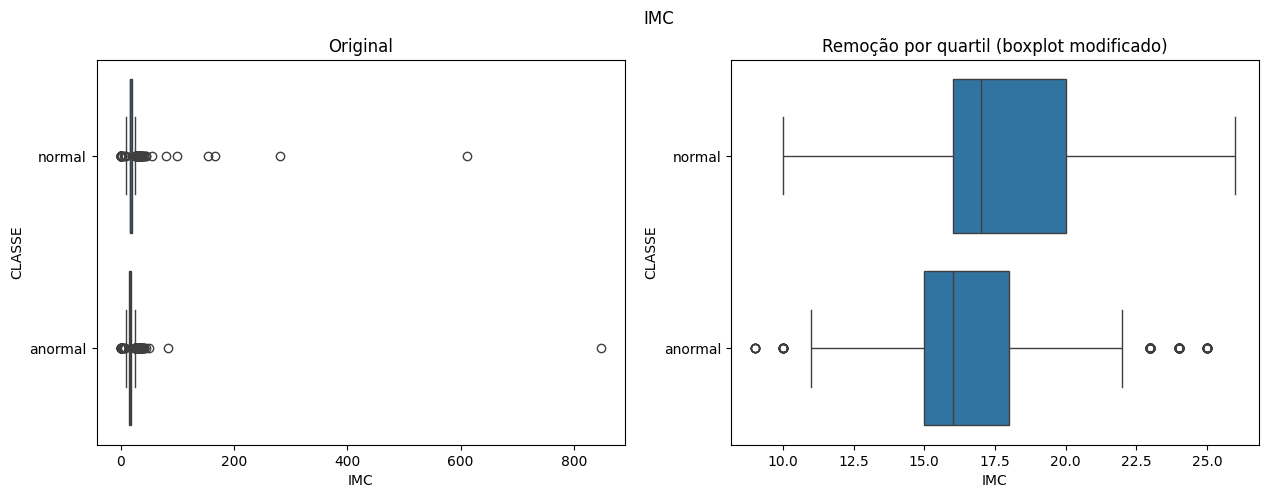

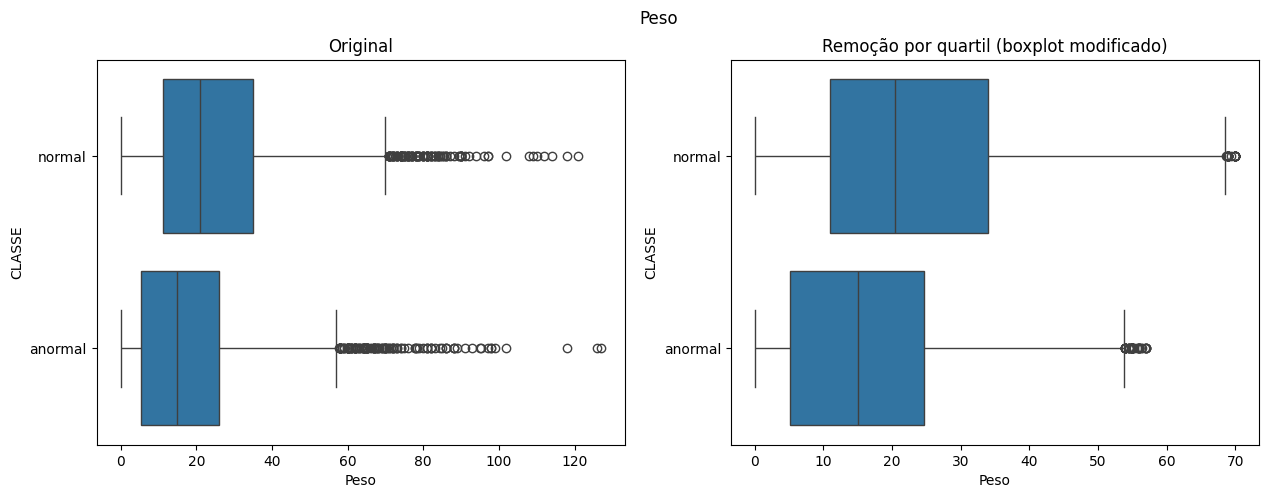

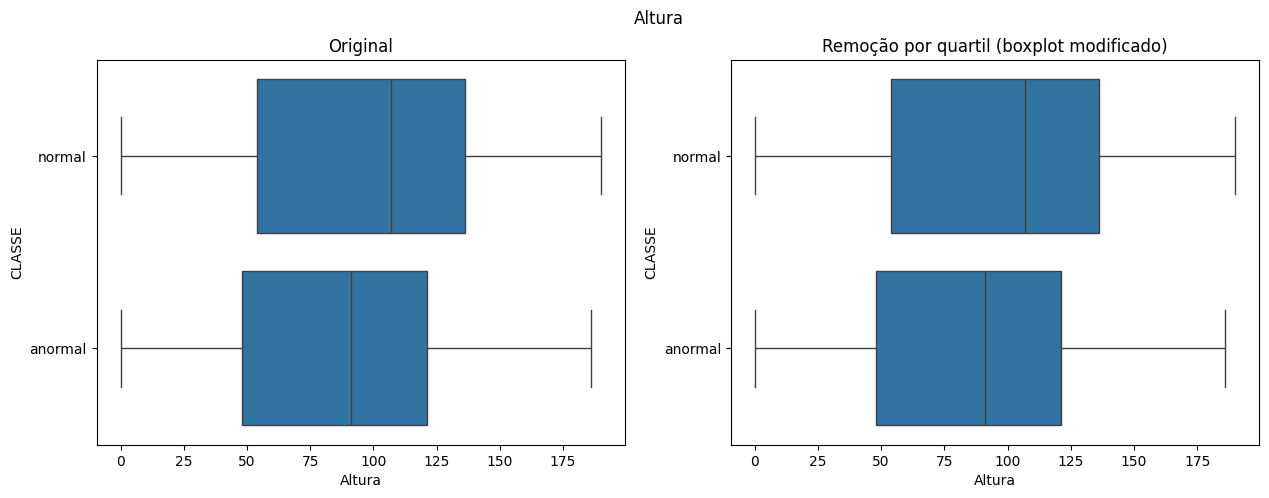

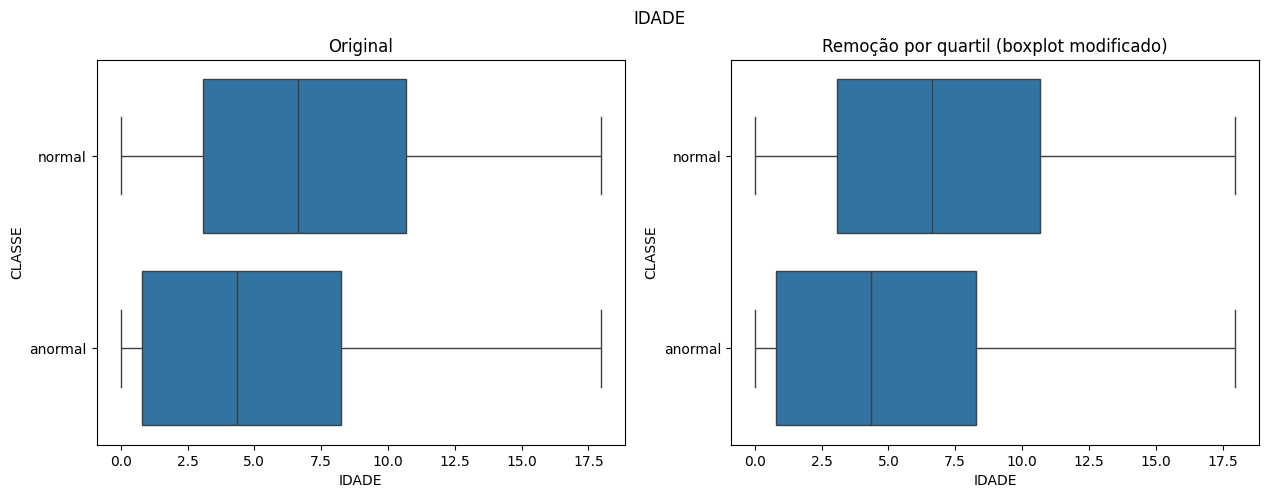

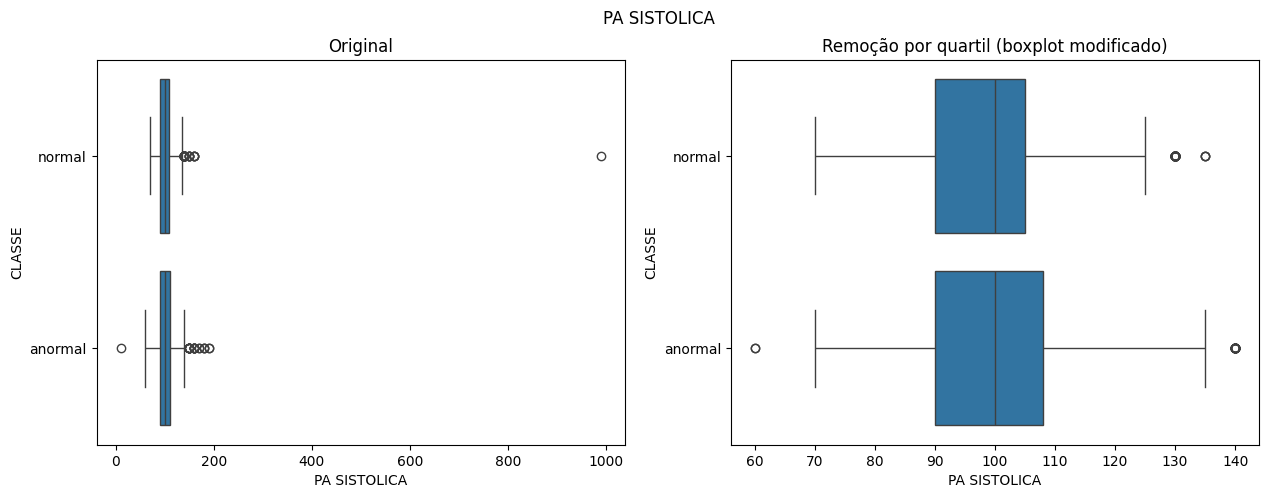

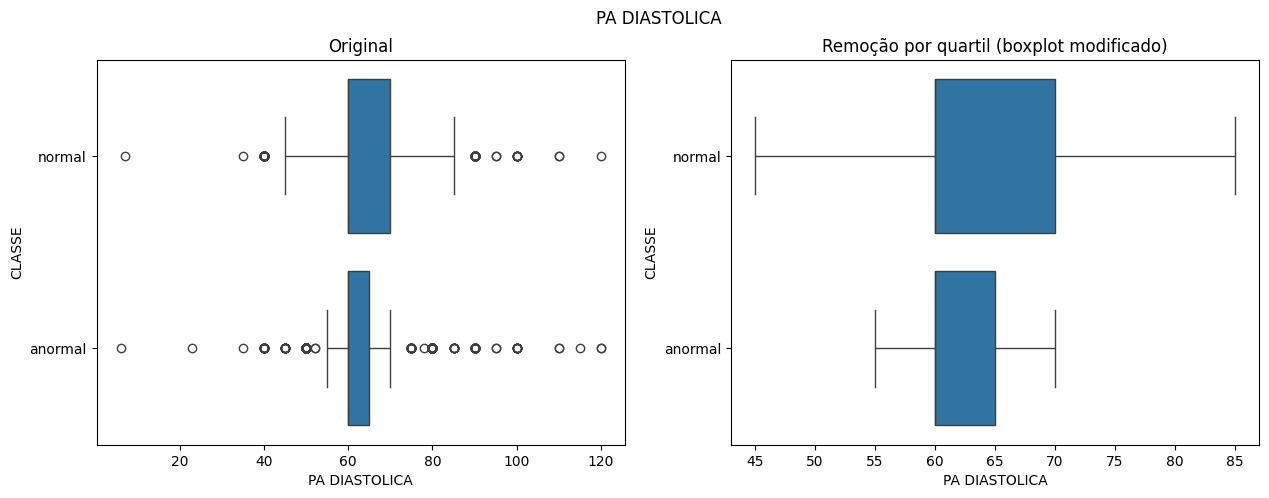

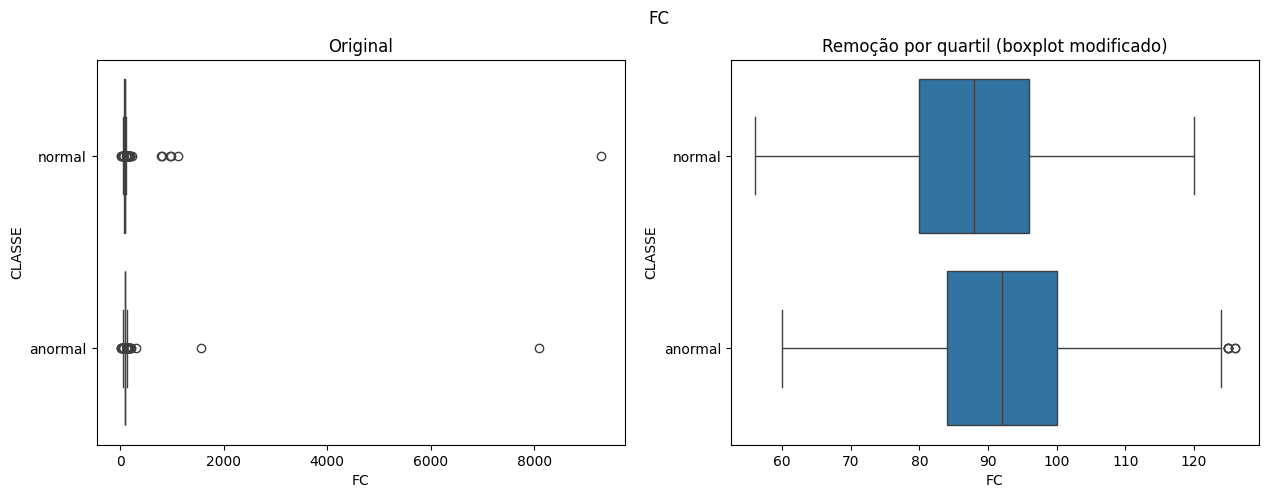

In [10]:
# IDENTIFICAR OUTLIERS SEM CONSIDERAR RELAÇÃO ENTRE ATRIBUTOS

# identificação de outliers por atributo (método boxplot modificado)
df_aux1 = invalidar_outliers_quartil(df_train, col_numerica)

for coluna in col_numerica:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=False, sharey=False)
    fig.suptitle(f"{coluna}")
    
    sns.boxplot(df_train, x=coluna, y='CLASSE', ax=axes[0])
    axes[0].set_title(f"Original")

    sns.boxplot(df_aux1, x=coluna, y='CLASSE', ax=axes[1])
    axes[1].set_title(f"Remoção por quartil (boxplot modificado)")
    plt.show()

df_train = df_aux1


In [ ]:
# EXCLUIR REGISTROS COM MENOS DE 30% DOS VALORES PREENCHIDOS 

analise_registro_incompleto(df_train, 0.3)
df_train = remover_registros_incompletos(df_train, 0.3).reset_index(drop=True)

print("Conjunto de treino sem registros com baixa taxa de preenchimento: ", df_train.shape)

491 de 13424 (3.657628128724672%) registros com mais de 30.0% dos atributos faltantes
Conjunto de treino sem registros com baixa taxa de preenchimento:  (12933, 15)


In [12]:
# GERANDO DIFERENTES IMPUTADORES (já ajustado com o conjunto de treino!)

imputador_3nn = imputador_faltantes_knn(df_train, col_numerica, 3)
imputador_media = imputador_faltantes_media(df_train, col_numerica)
imputador_mediana = imputador_faltantes_mediana(df_train, col_numerica)

imputador_moda = imputador_faltantes_moda(df_train, col_categorica)


In [13]:
# IMPUTANDO DADOS NUMÉRICOS

df_train_imputed_3nn = pd.DataFrame(imputador_3nn.transform(df_train[col_numerica]), columns=col_numerica)
df_train_imputed_media = pd.DataFrame(imputador_media.transform(df_train[col_numerica]), columns=col_numerica)
df_train_imputed_mediana = pd.DataFrame(imputador_mediana.transform(df_train[col_numerica]), columns=col_numerica)

Relação de atributos e porcentagem de nulos: 


,qtd,%
IMC,3143.0,24.302173
Peso,431.0,3.332560
Altura,0.0,0.000000
IDADE,589.0,4.554241
PA SISTOLICA,4933.0,38.142736
PA DIASTOLICA,5603.0,43.323282
FC,1113.0,8.605892


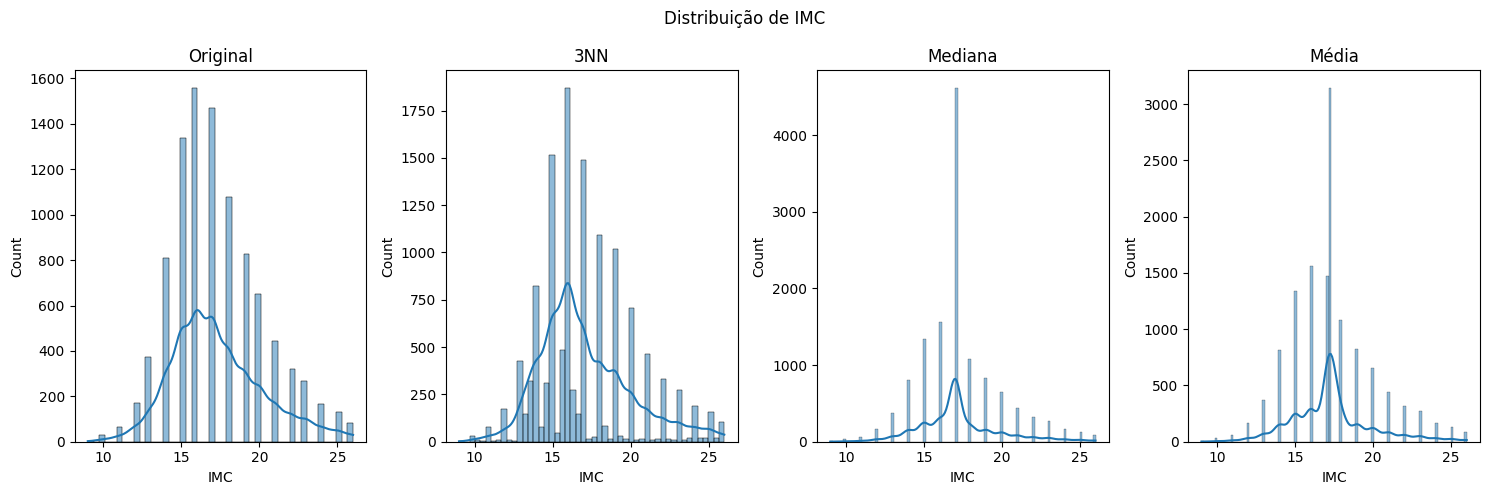

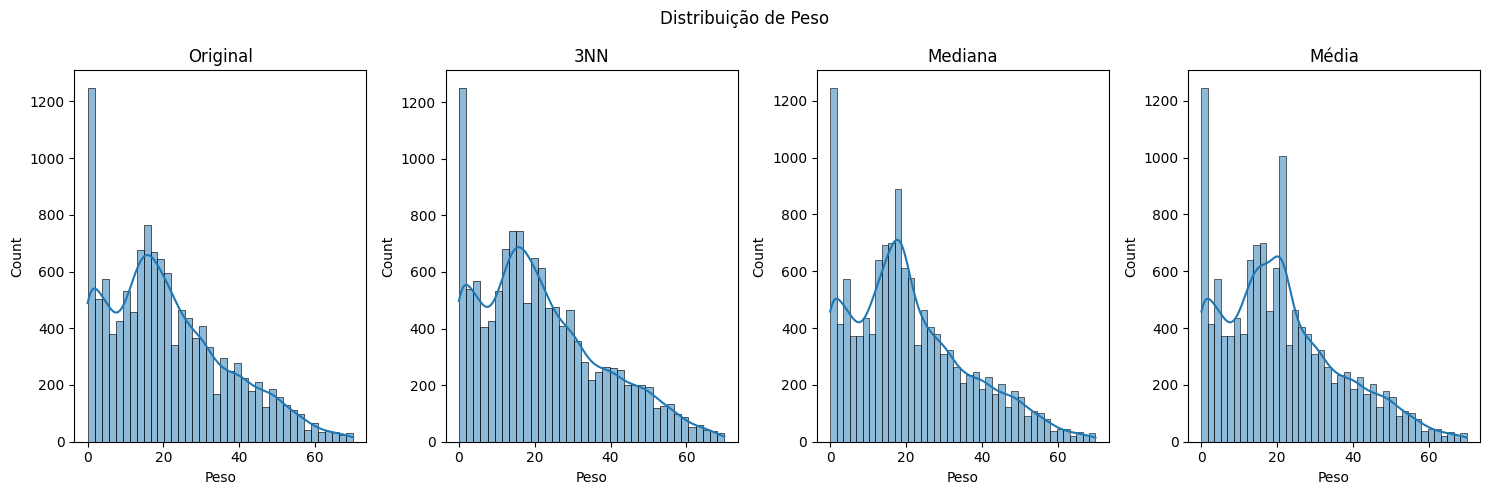

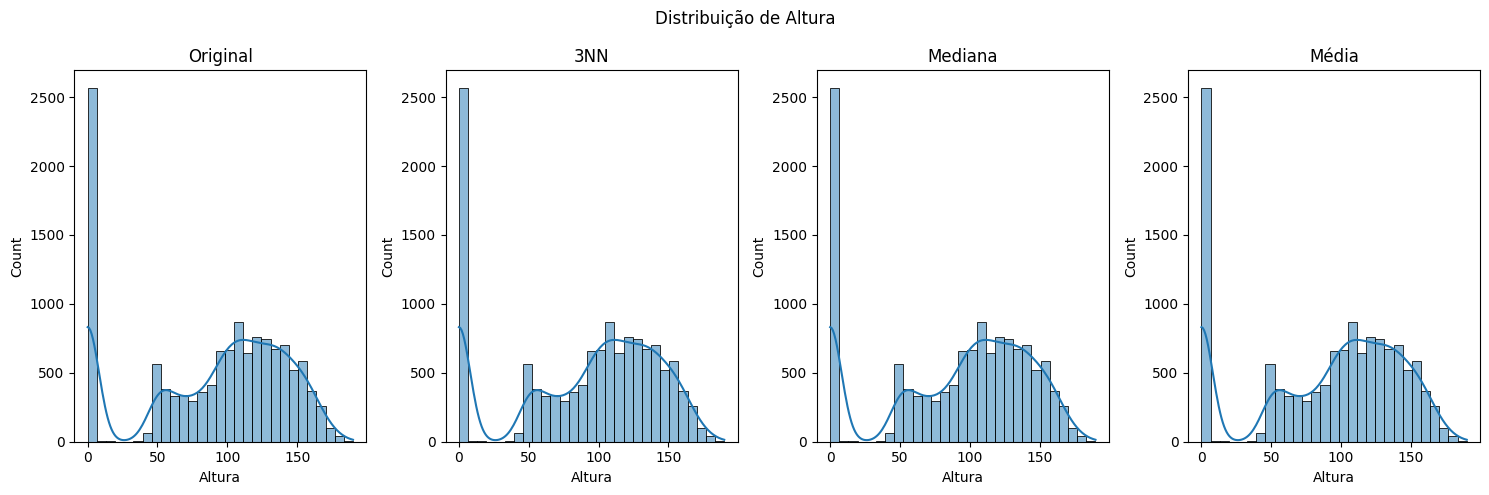

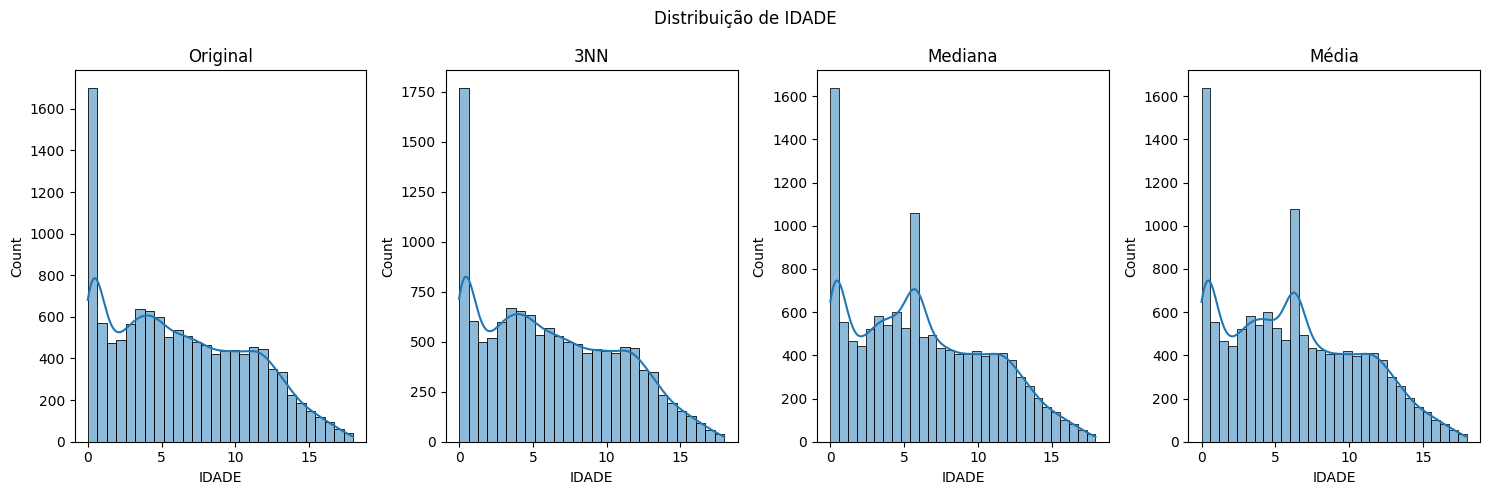

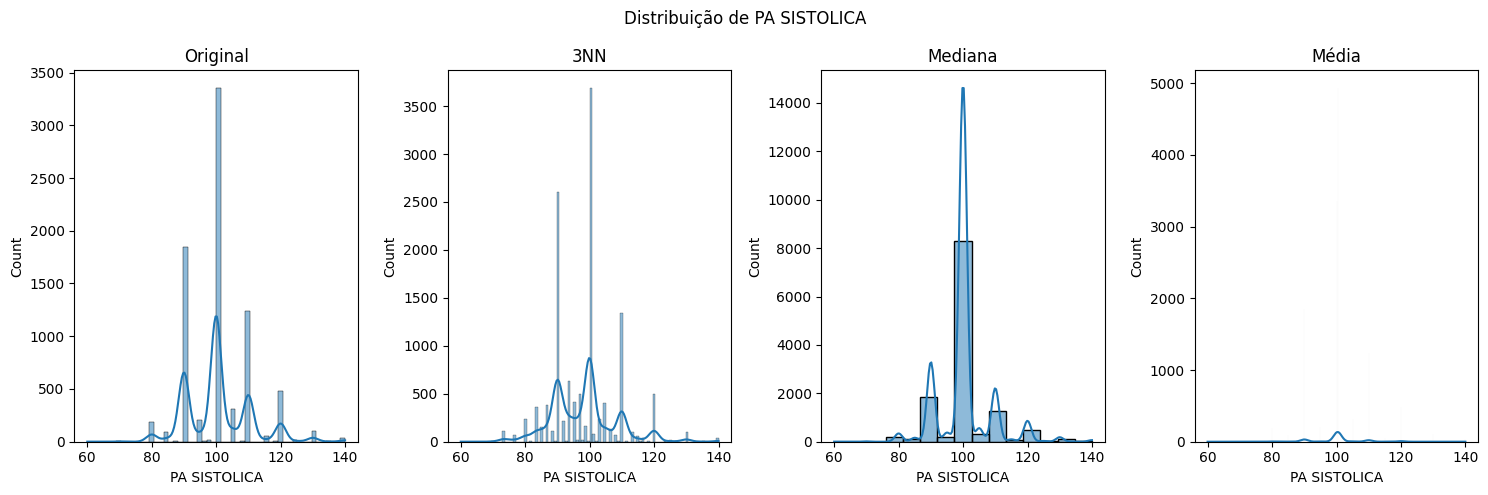

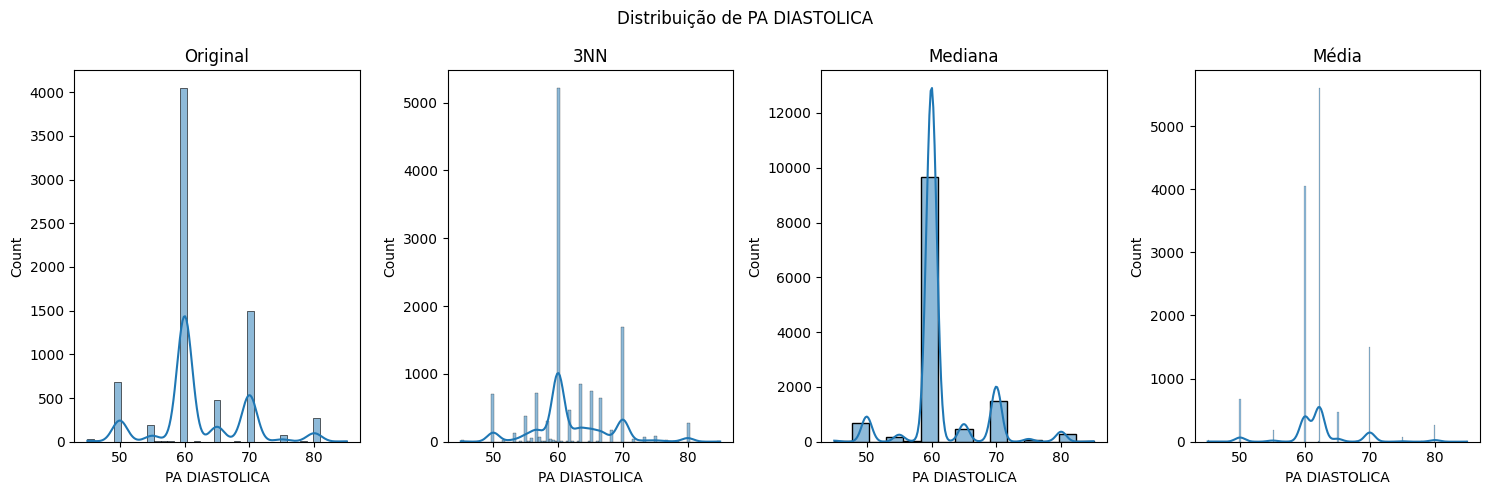

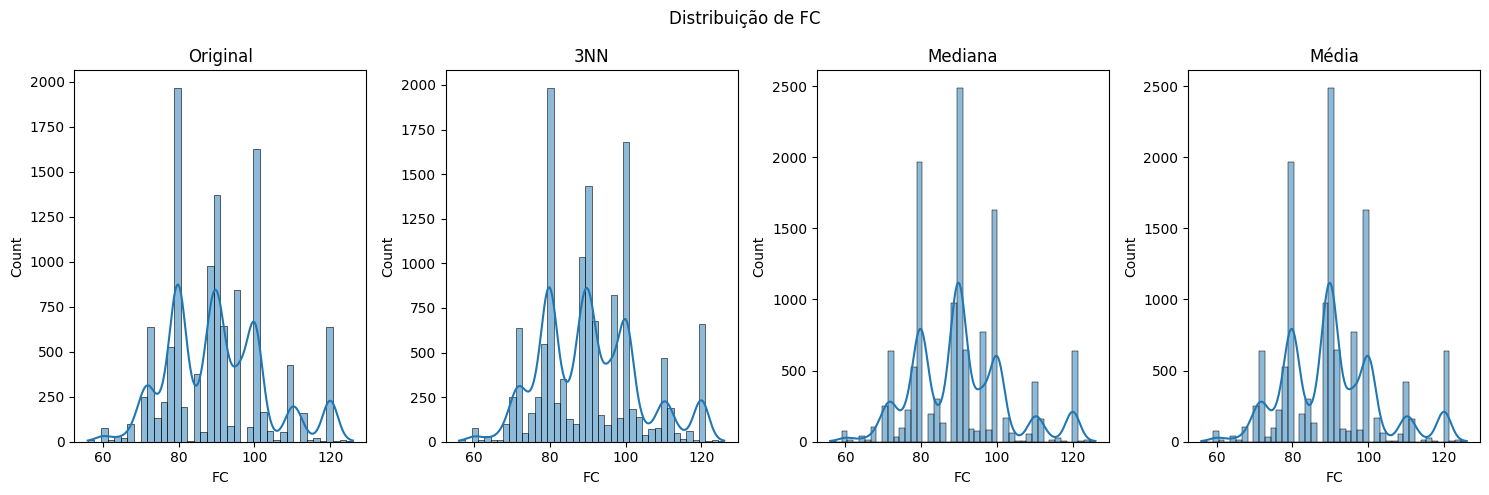

In [14]:
# COMPARANDO DISTRIBUIÇÃO ORIGINAL E DOS IMPUTADOS


analise_valores_faltantes(df_train[col_numerica])

for coluna in col_numerica:
    fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=False, sharey=False)
    fig.suptitle(f"Distribuição de {coluna}")
    # axes.set_xlabel("Valor")

    sns.histplot(df_train[coluna], ax=axes[0], kde=True)
    axes[0].set_title(f"Original")

    sns.histplot(df_train_imputed_3nn[coluna], ax=axes[1], kde=True)
    axes[1].set_title(f"3NN")
    
    sns.histplot(df_train_imputed_mediana[coluna], ax=axes[2], kde=True)
    axes[2].set_title(f"Mediana")
    
    sns.histplot(df_train_imputed_media[coluna], ax=axes[3], kde=True)
    axes[3].set_title(f"Média")

    plt.tight_layout()    
    plt.show()

In [15]:
# IMPUTANDO DADOS CATEGÓRICOS

df_imputed_moda = pd.DataFrame(imputador_moda.transform(df_train[col_categorica]), columns=col_categorica)

Relação de atributos e porcentagem de nulos: 


,qtd,%
PULSOS,18.0,0.139179
B2,7.0,0.054125
SOPRO,0.0,0.000000
HDA 1,3057.0,23.637207
SEXO,343.0,2.652130
MOTIVO1,110.0,0.850537


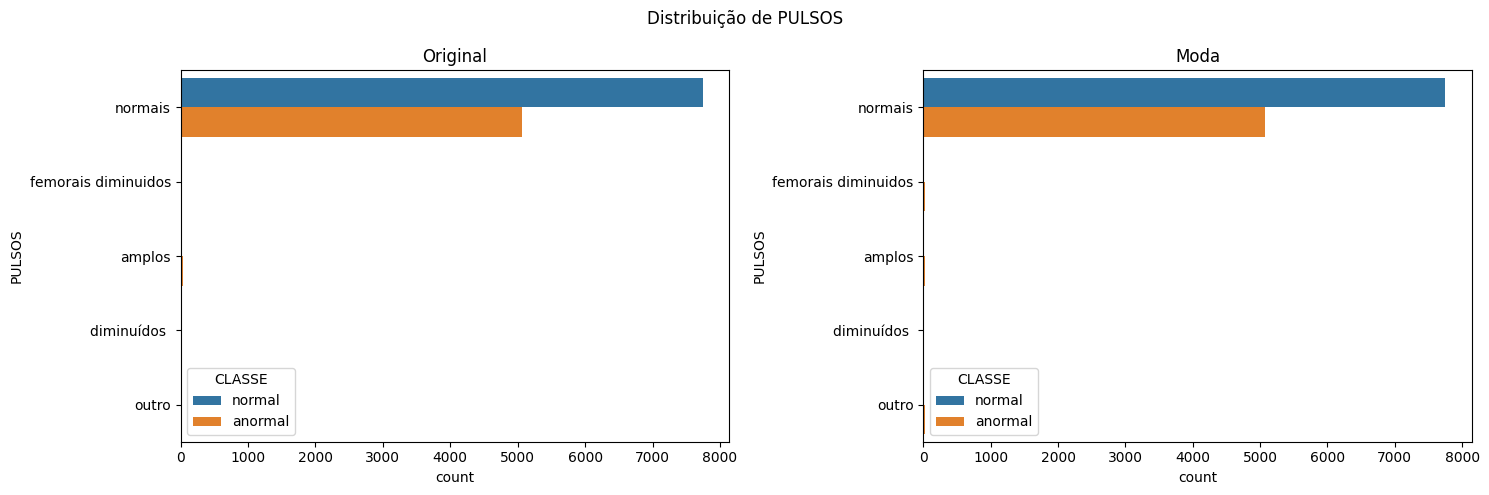

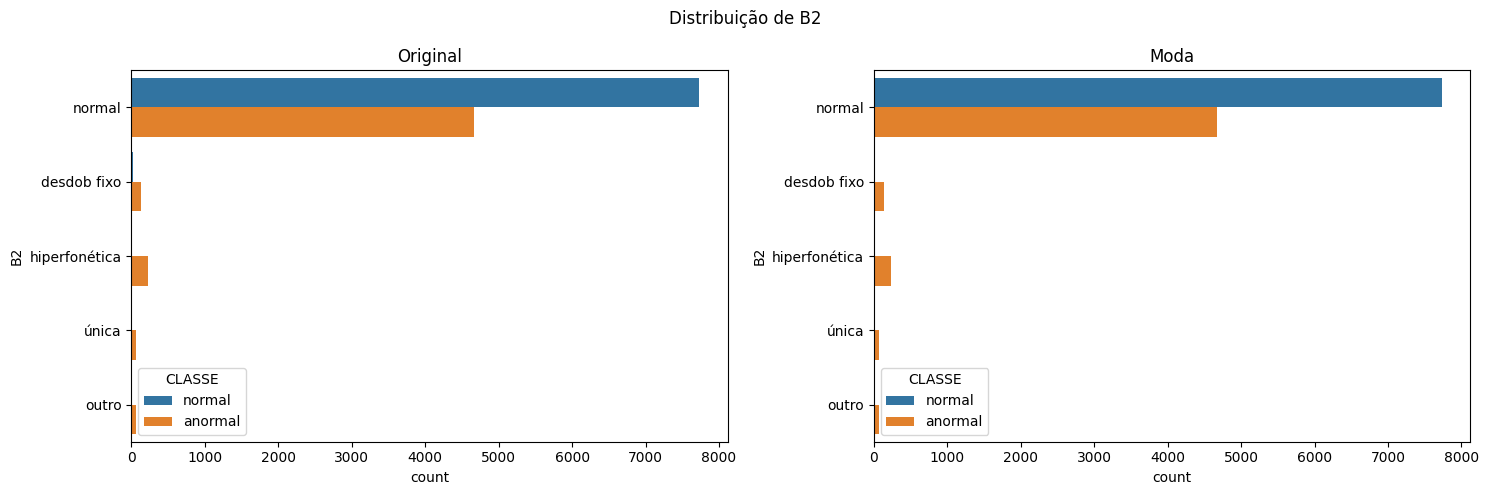

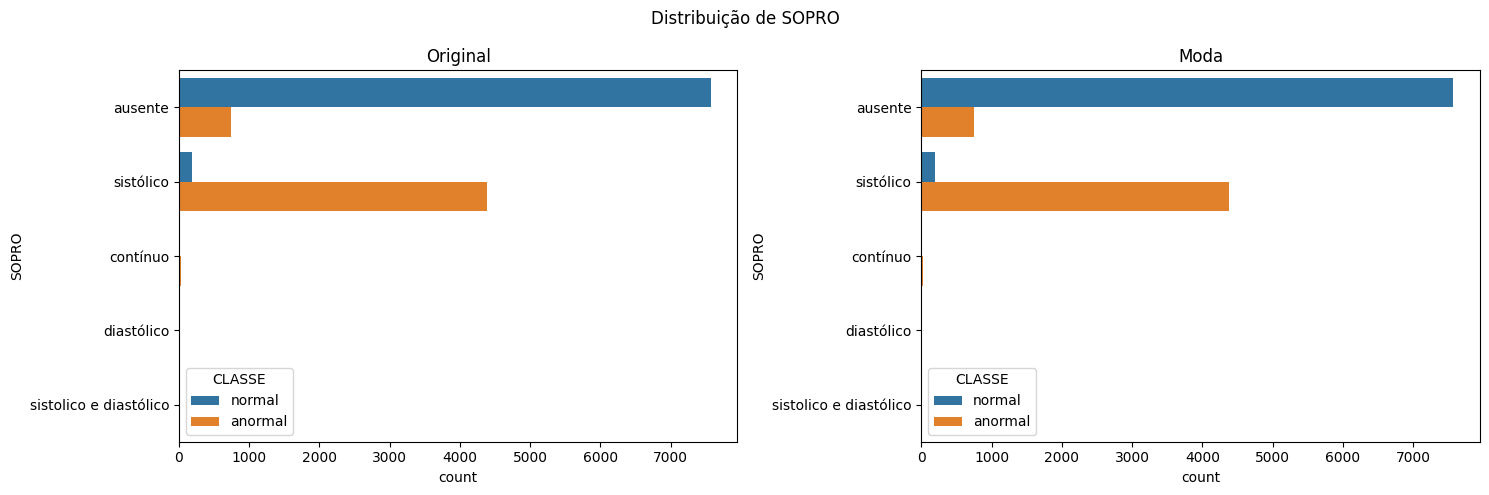

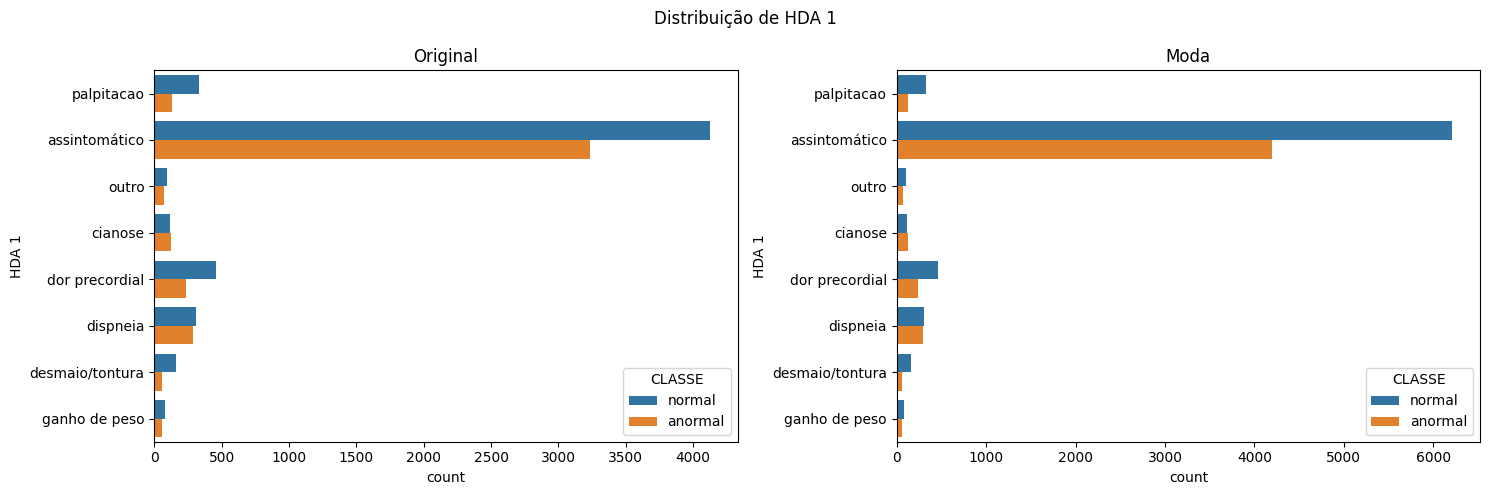

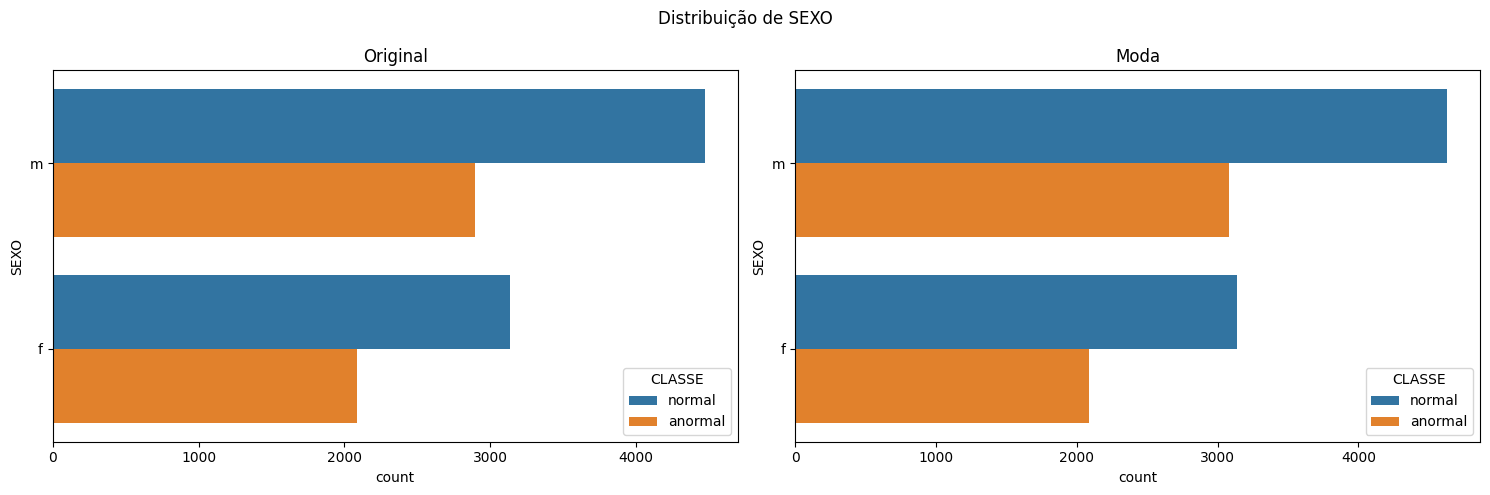

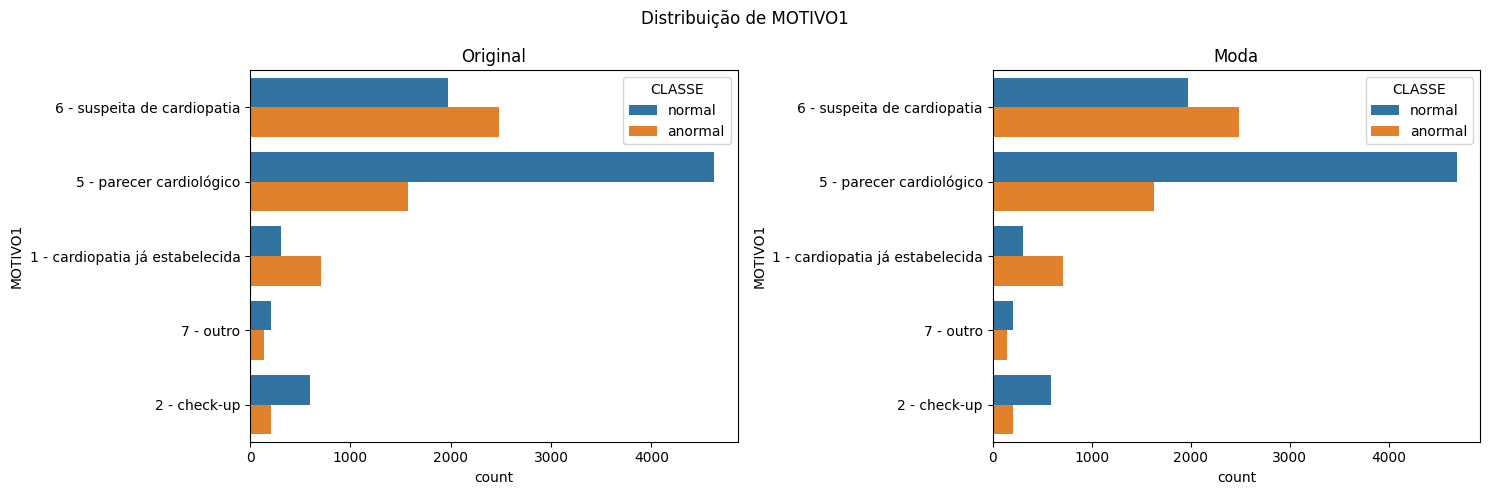

In [16]:
# COMPARANDO DISTRIBUIÇÃO ORIGINAL E DOS IMPUTADOS

df_imputed_moda = pd.concat([df_imputed_moda, df_train['CLASSE']], axis=1)

analise_valores_faltantes(df_train[col_categorica])

for coluna in col_categorica:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=False, sharey=False)
    fig.suptitle(f"Distribuição de {coluna}")
    # axes.set_xlabel("Valor")

    sns.countplot(df_train, y=coluna, ax=axes[0], hue='CLASSE')
    axes[0].set_title(f"Original")

    sns.countplot(df_imputed_moda, y=coluna, ax=axes[1], hue='CLASSE')
    axes[1].set_title(f"Moda")

    plt.tight_layout()    
    plt.show()


df_imputed_moda = df_imputed_moda.drop(columns=['CLASSE'])

In [17]:
# ADOÇÃO DOS MELHORES IMPUTERS

# TREINO
df_train[col_numerica] = df_train_imputed_3nn
df_train[col_categorica] = df_imputed_moda

# TESTE
df_test[col_numerica] = pd.DataFrame(imputador_3nn.transform(df_test[col_numerica]), columns=col_numerica)
df_test[col_categorica] = pd.DataFrame(imputador_moda.transform(df_test[col_categorica]), columns=col_categorica)

In [18]:
# EXLUIR DUPLICATAS (mesmos valores de atributos e mesma classifiação)

df_train = remover_duplicatas(df_train).reset_index(drop=True)
print("Conjunto de treino sem duplicatas: ", df_train.shape)

Conjunto de treino sem duplicatas:  (12832, 15)


In [19]:
# EXCLUIR INCONSISTÊNCIAS (mesmos valores de atributos e classificação diferente)

df_train = remover_inconsistencia(df_train).reset_index(drop=True)
print("Registros de treino sem inconsistências: ", df_train.shape)

Registros de treino sem inconsistências:  (12828, 15)


In [20]:
# GERANDO CODIFICADORES (já ajustado com o conjunto de treino!)
col_ordinal_categorias = [categoria_hda1, categoria_motivo1]
codificador_ordinal = codificador_ordinais(df_train, col_ordinal, col_ordinal_categorias) 

codificador_oneHot = codificador_nominais(df_train, col_nominal)


['HDA 1', 'MOTIVO1']


In [21]:
display(df_train)

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,B2,SOPRO,FC,HDA 1,SEXO,MOTIVO1,CLASSE
0,10524,28.0,123.0,19.000000,5.79,normais,110.000000,80.000000,normal,ausente,100.0,palpitacao,m,6 - suspeita de cardiopatia,normal
1,17249,32.0,0.0,18.333333,12.11,normais,100.000000,60.000000,normal,sistólico,100.0,assintomático,m,5 - parecer cardiológico,anormal
2,4483,13.0,87.0,17.000000,2.21,normais,93.333333,56.666667,normal,sistólico,100.0,assintomático,m,6 - suspeita de cardiopatia,anormal
3,6830,11.0,0.0,15.666667,1.60,normais,93.333333,60.000000,normal,ausente,100.0,assintomático,f,1 - cardiopatia já estabelecida,normal
4,11652,42.4,136.0,23.000000,0.06,normais,100.000000,60.000000,normal,ausente,78.0,assintomático,f,5 - parecer cardiológico,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12823,3023,25.0,126.0,16.000000,8.80,normais,100.000000,60.000000,normal,ausente,76.0,assintomático,f,5 - parecer cardiológico,normal
12824,3249,30.0,113.0,23.000000,4.97,normais,105.000000,70.000000,normal,sistólico,92.0,dispneia,f,6 - suspeita de cardiopatia,anormal
12825,3207,25.8,130.0,15.000000,7.69,normais,90.000000,55.000000,normal,ausente,78.0,assintomático,m,6 - suspeita de cardiopatia,normal
12826,4336,19.0,0.0,15.666667,3.23,normais,100.000000,50.000000,normal,ausente,100.0,assintomático,m,5 - parecer cardiológico,normal


In [22]:
# TRANSFORMÇÃO SIMBÓLICO NUMÉRICO

# TREINO
df_train[col_ordinal] = pd.DataFrame(codificador_ordinal.transform(df_train[col_ordinal]), columns=col_ordinal)


df_train_encoded_nominal = pd.DataFrame(codificador_oneHot.transform(df_train[col_nominal]), columns=codificador_oneHot.get_feature_names_out(col_nominal))
# A ordem será alterada, para mantermos a classe no final ela vai ser separada temporariamente
classes = df_train.iloc[:, -1]
df_train = df_train.drop(columns=["PULSOS", "B2", "SOPRO", "SEXO", "CLASSE"])
# É adicionada novamente a coluna da classe
df_train = pd.concat([df_train, df_train_encoded_nominal], axis=1)
df_train = pd.concat([df_train, classes], axis=1)

# TESTE
df_test[col_ordinal] = pd.DataFrame(codificador_ordinal.transform(df_test[col_ordinal]), columns=col_ordinal)

df_test_encoded_nominal = pd.DataFrame(codificador_oneHot.transform(df_test[col_nominal]), columns=codificador_oneHot.get_feature_names_out(col_nominal))
df_test = df_test.drop(columns=["PULSOS", "B2", "SOPRO", "SEXO"])
df_test = pd.concat([df_test, df_test_encoded_nominal], axis=1)


In [23]:
# CODIFICANDO ATRIBUTO ALVO

df_train['CLASSE'] = df_train['CLASSE'].apply(lambda x: 0 if x in ['normal'] else 1 if x in ['anormal'] else np.nan)

In [24]:
# ANALISANDO CORRELAÇÃO

matriz_correlacao(df_train, col_numerica+col_ordinal)

,IMC,Peso,Altura,IDADE,PA SISTOLICA,PA DIASTOLICA,FC,HDA 1,MOTIVO1
IMC,1.000000,0.652031,0.426117,0.354779,0.338161,0.210349,-0.226699,0.029624,-0.002264
Peso,0.652031,1.000000,0.697242,0.749365,0.451600,0.229392,-0.470770,0.065032,-0.002423
Altura,0.426117,0.697242,1.000000,0.481397,0.207397,0.069167,-0.323535,0.011163,-0.010237
IDADE,0.354779,0.749365,0.481397,1.000000,0.511400,0.231210,-0.593286,0.086498,-0.012143
PA SISTOLICA,0.338161,0.451600,0.207397,0.511400,1.000000,0.579351,-0.346703,0.056686,-0.016900
PA DIASTOLICA,0.210349,0.229392,0.069167,0.231210,0.579351,1.000000,-0.057631,0.039267,-0.060383
FC,-0.226699,-0.470770,-0.323535,-0.593286,-0.346703,-0.057631,1.000000,-0.001060,-0.021715
HDA 1,0.029624,0.065032,0.011163,0.086498,0.056686,0.039267,-0.001060,1.000000,-0.082569
MOTIVO1,-0.002264,-0.002423,-0.010237,-0.012143,-0.016900,-0.060383,-0.021715,-0.082569,1.000000


In [25]:
# GERAR NORMALIZADOR

normalizador_padrao = normalizador(df_train, df_train.columns[1:-1])

In [26]:
# NORMLAIZAR ATRIBUTOS

# TREINO
df_train.iloc[:, 1:-1] = pd.DataFrame(normalizador_padrao.transform(df_train.iloc[:, 1:-1]), columns=df_train.columns[1:-1])

# TESTE
df_test.iloc[:, 1:] = pd.DataFrame(normalizador_padrao.transform(df_test.iloc[:, 1:]), columns=df_test.columns[1:])


---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

In [27]:
# GUARDAR DATAFRAME EM MATRIZES

from sklearn.model_selection import train_test_split

X_test_og = df_test.iloc[:, 1:].values

X_train_og = df_train.iloc[:, 1:-1].values
y_train_og = df_train.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X_train_og, y_train_og, test_size=0.2, random_state=10)

In [31]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Parâmetros para ajuste
param_grids = {
    "KNN": {
        # "n_neighbors": [3, 5, 7],
        # "metric": ['euclidean', 'manhattan', 'minkowski'],
        # "weights": ["uniform", "distance"] 
    },
    "Naive Bayes": {},  
    "Logistic Regression": {
        # "C": [0.1, 1, 10], # inverso da regularização (1/lambda)
        # "solver": ["liblinear"],
        # "penalty": ["l1", "l2"] 
    },
    "Random Forest": {
        # "n_estimators": [100, 200, 500],
        # "max_depth": [None, 10, 20, 30],
        # "min_samples_split": [2, 5, 10]
    },
    "Gradient Boosting": {
        # "n_estimators": [100, 200, 500],
        # "learning_rate": [0.01, 0.1, 0.2],
        # "max_depth": [3, 5, 7]
    },
    "Neural Network": {
        # "hidden_layer_sizes": [(50,), (30,), (20,)], 
        # "activation": ["relu"],
        # "alpha": [0.00001, 0.0001]
    },
    "SVM": {}
}

# Modelos disponíveis
models = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Avaliação de modelos
def avaliar_modelos(models, param_grids, X_train, y_train, X_test, y_test):
    results = {}

    # Configurando o K-Folds
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for name, model in models.items():
        print(f"Avaliando {name}...")
        
        # Ajuste de hiperparâmetros, se aplicável
        if name in param_grids and param_grids[name]:
            grid_search = GridSearchCV(model, param_grid=param_grids[name], cv=kfold, scoring="accuracy")
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            print(f"Melhores parâmetros para {name}: {grid_search.best_params_}")
        else:
            # Caso sem ajuste de hiperparâmetros
            best_model = model
            best_model.fit(X_train, y_train)

        # Predição
        y_pred = best_model.predict(X_test)

        # Métricas
        acc = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        class_report = classification_report(y_test, y_pred)

        results[name] = {
            "Accuracy": acc,
            "Confusion Matrix": conf_matrix,
            "Classification Report": class_report
        }

        print(f"Accuracy: {acc:.4f}")
        print("Confusion Matrix:")
        print(conf_matrix)
        print("Classification Report:")
        print(class_report)

    return results

# Exemplo de uso
def experimento(X_train, y_train, X_test, y_test):
    results = avaliar_modelos(models, param_grids, X_train, y_train, X_test, y_test)
    return results

# Dados de exemplo (substituir com os dados reais)
results = experimento(X_train, y_train, X_test, y_test)


Avaliando KNN...
Accuracy: 0.9283
Confusion Matrix:
[[1520   51]
 [ 133  862]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1571
           1       0.94      0.87      0.90       995

    accuracy                           0.93      2566
   macro avg       0.93      0.92      0.92      2566
weighted avg       0.93      0.93      0.93      2566

Avaliando Naive Bayes...
Accuracy: 0.6469
Confusion Matrix:
[[1562    9]
 [ 897   98]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.99      0.78      1571
           1       0.92      0.10      0.18       995

    accuracy                           0.65      2566
   macro avg       0.78      0.55      0.48      2566
weighted avg       0.74      0.65      0.54      2566

Avaliando Logistic Regression...
Accuracy: 0.9361
Confusion Matrix:
[[1533   38]
 [ 126  869]]
Classification Report:
              pr

c:\Users\laura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9341
Confusion Matrix:
[[1525   46]
 [ 123  872]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1571
           1       0.95      0.88      0.91       995

    accuracy                           0.93      2566
   macro avg       0.94      0.92      0.93      2566
weighted avg       0.93      0.93      0.93      2566

Avaliando SVM...
Accuracy: 0.9357
Confusion Matrix:
[[1531   40]
 [ 125  870]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1571
           1       0.96      0.87      0.91       995

    accuracy                           0.94      2566
   macro avg       0.94      0.92      0.93      2566
weighted avg       0.94      0.94      0.94      2566



In [29]:
display(df_train)

,Id,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC,HDA 1,MOTIVO1,...,B2_outro,B2_única,SOPRO_ausente,SOPRO_contínuo,SOPRO_diastólico,SOPRO_sistolico e diastólico,SOPRO_sistólico,SEXO_f,SEXO_m,CLASSE
0,10524,0.377294,0.624727,0.652252,-0.111946,1.176196,2.986820,0.733292,0.793988,-0.540724,...,-0.076172,-0.069123,0.742899,-0.053783,-0.021632,-0.012487,-0.737222,-0.822717,0.822717,0
1,17249,0.624544,-1.670947,0.426718,1.272974,0.184349,-0.331409,0.733292,-0.444720,0.554902,...,-0.076172,-0.069123,-1.346077,-0.053783,-0.021632,-0.012487,1.356443,-0.822717,0.822717,1
2,4483,-0.549893,-0.047178,-0.024350,-0.896442,-0.476883,-0.884447,0.733292,-0.444720,-0.540724,...,-0.076172,-0.069123,-1.346077,-0.053783,-0.021632,-0.012487,1.356443,-0.822717,0.822717,1
3,6830,-0.673518,-1.670947,-0.475418,-1.030113,-0.476883,-0.331409,0.733292,-0.444720,1.650529,...,-0.076172,-0.069123,0.742899,-0.053783,-0.021632,-0.012487,-0.737222,1.215485,-1.215485,0
4,11652,1.267394,0.867359,2.005456,-1.367578,0.184349,-0.331409,-0.962933,-0.444720,0.554902,...,-0.076172,-0.069123,0.742899,-0.053783,-0.021632,-0.012487,-0.737222,1.215485,-1.215485,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12823,3023,0.191857,0.680719,-0.362651,0.547644,0.184349,-0.331409,-1.117135,-0.444720,0.554902,...,-0.076172,-0.069123,0.742899,-0.053783,-0.021632,-0.012487,-0.737222,1.215485,-1.215485,0
12824,3249,0.500919,0.438086,2.005456,-0.291635,0.680273,1.327705,0.116483,2.032696,-0.540724,...,-0.076172,-0.069123,-1.346077,-0.053783,-0.021632,-0.012487,1.356443,1.215485,-1.215485,1
12825,3207,0.241307,0.755375,-0.700952,0.304406,-0.807498,-1.160966,-0.962933,-0.444720,-0.540724,...,-0.076172,-0.069123,0.742899,-0.053783,-0.021632,-0.012487,-0.737222,-0.822717,0.822717,0
12826,4336,-0.179018,-1.670947,-0.475418,-0.672927,0.184349,-1.990523,0.733292,-0.444720,0.554902,...,-0.076172,-0.069123,0.742899,-0.053783,-0.021632,-0.012487,-0.737222,-0.822717,0.822717,0


In [30]:
# PREDIÇÃO

# modelo = MLPClassifier(max_iter=10000)
# modelo.fit(X_train_og, y_train_og)
# y_test_og = modelo.predict(X_test_og)

# df_test_y = pd.DataFrame({'Id': df_test['Id'], 'Predicted': y_test_og})
# df_test_y.to_csv('submissoes/submission4.csv', index=False)

---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.